In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
data = pd.read_csv('Airline Dataset Updated.csv') 

In [3]:
data

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,300,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,300,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,190,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,350,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ300,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-22,HAA,Gareth Mugford,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-22,ABC,Darrin Lucken,On Time
98617,E250NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled


In [4]:
data.shape

(98619, 15)

In [5]:
data.isna().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [6]:
data.dtypes

Passenger ID            object
First Name              object
Last Name               object
Gender                  object
Age                      int64
Nationality             object
Airport Name            object
Airport Country Code    object
Country Name            object
Airport Continent       object
Continents              object
Departure Date          object
Arrival Airport         object
Pilot Name              object
Flight Status           object
dtype: object

<AxesSubplot:ylabel='Age'>

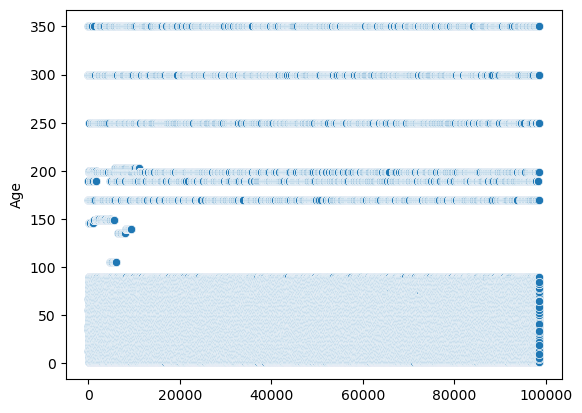

In [7]:
sns.scatterplot(data['Age'])

In [8]:
data['Age'].describe()

count    98619.000000
mean        58.182308
std         58.033353
min          1.000000
25%         24.000000
50%         48.000000
75%         74.000000
max        350.000000
Name: Age, dtype: float64

In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_Age = scaler.fit_transform(data[['Age']])

In [10]:
data[['Age']]

,Age
0,300
1,300
2,67
3,190
4,350
...,...
98614,85
98615,19
98616,65
98617,34


In [11]:
scaled_Age

array([[ 4.16689549],
       [ 4.16689549],
       [ 0.15194257],
       ...,
       [ 0.11747946],
       [-0.41669883],
       [-0.83025621]])

Apply k-means Clustering

In [12]:
# Choose the number of clusters (K)
k = 2
# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_Age)
data["clusters"] = clusters
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,clusters
0,ABVWIg,Edithe,Leggis,Female,300,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time,1
1,jkXXAX,Elwood,Catt,Male,300,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time,1
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time,0
3,BRS38V,Dominica,Pyle,Female,190,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed,1
4,9kvTLo,Bay,Pencost,Male,350,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time,1


In [13]:
data['clusters'].value_counts()

0    91988
1     6631
Name: clusters, dtype: int64

In [14]:
def print_min_max(data, cluster, cluster_label):
    """
    Args:
    data: the dataframe
    cluster: The n cluster whose min and max values we want to calculate e;g 0, 1, 2 ...
    cluster_label: The cluster algorithm label column name.

    Returns:
    The min and max values of the data points within the provided cluster.
    """
    min_ = data[data[cluster_label]==cluster]['Age'].min()
    max_ = data[data[cluster_label]==cluster]['Age'].max()
    
    return {"min": min_, "max": max_}
    
for cluster in [0, 1]:
    print(f"Cluster {cluster}: ", print_min_max(data, cluster, "clusters"))

Cluster 0:  {'min': 1, 'max': 140}
Cluster 1:  {'min': 146, 'max': 350}


C:\Users\Pawn1st\AppData\Local\Temp\ipykernel_11784\549076033.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=ax, x=data['clusters'], y=data['Age'], palette='viridis')


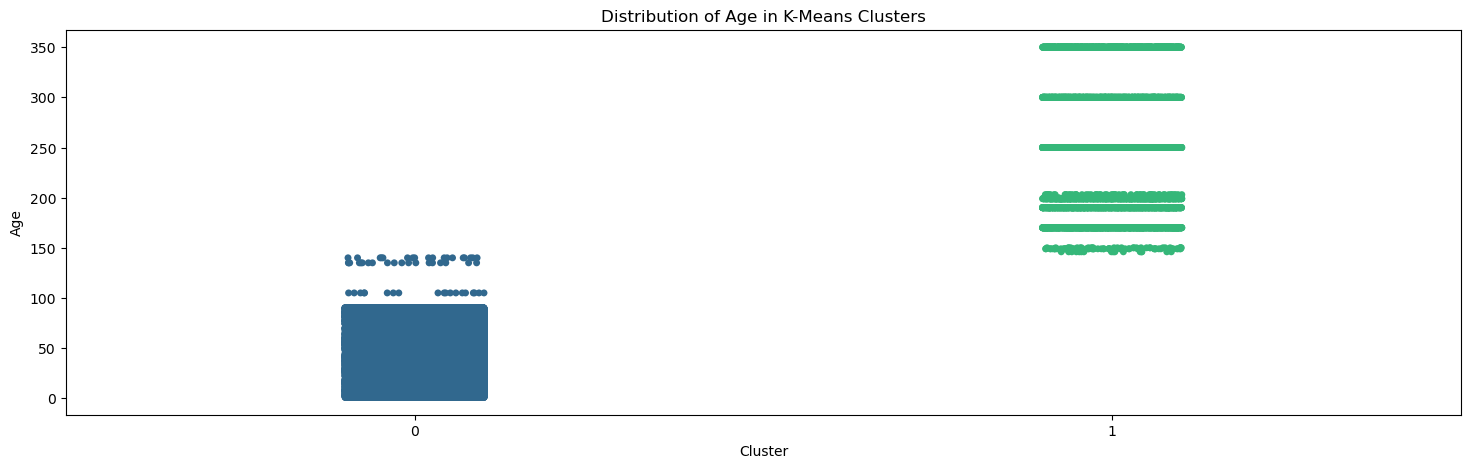

In [15]:
fig, ax = plt.subplots(figsize=(18, 5))

sns.stripplot(ax=ax, x=data['clusters'], y=data['Age'], palette='viridis')
ax.set_title(f'Distribution of Age in K-Means Clusters')
ax.set_xlabel('Cluster')
ax.set_ylabel('Age')

plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

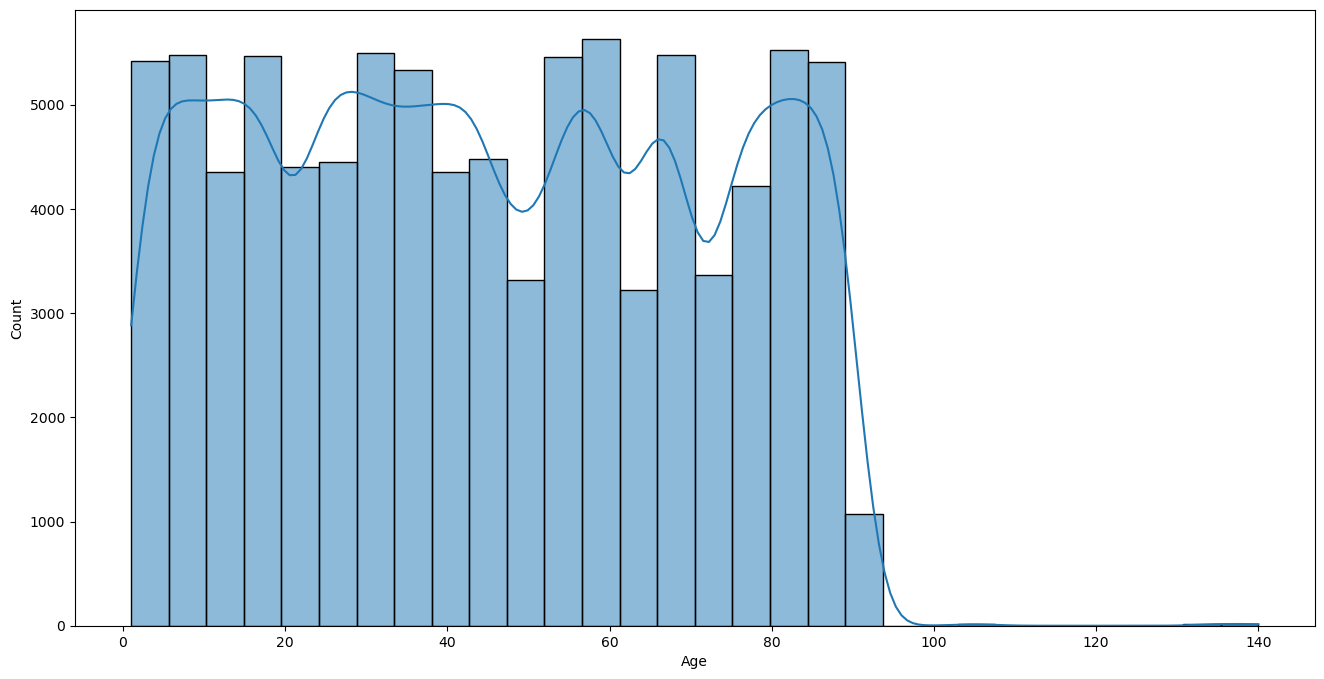

In [25]:
plt.figure(figsize=(16, 8))
sns.histplot(x=data[data['clusters']==0]['Age'], data=data[data['clusters']==0], bins=30, kde=True)